# Research of videogames’ market for online store

## Intro

In the upcoming project, our main task is to identify the factors which determine the sales of video games each year.  Then, based on these factors, we will try to predict sales for the upcoming year. Our customer is the worldwide video games store and it provided us data on game sales for the past 35 years.
The dataset includes the title of the game, the released platform, the year of release, the genre, the rating of critics and users, the age rating, and the number of sales around the world, divided by region.

Our research will include the following steps:

1) Finding the most popular gaming platforms.

3) Creating portraits of average users in different regions.

4) Estimating how the scores of critics and users affect the sales of games.

5) Testing two hypotheses: 
 - games released on XOne and PC platforms have the same user scores;
 - Game genres sports and action have different user scores.
 
6) Draw conclusions based on the conducted study.


## Data overview

### Import of libraries

In [143]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats as st
import seaborn as sns
import numpy as np
import math as m
import datetime 
import warnings
warnings.filterwarnings('ignore')

We imported necessary libraries.

### Import of datasets

In [144]:
try:
    data = pd.read_csv('C:/Praktikum/game_prognosis_project/games.csv')
except:
    data = pd.read_csv('/datasets/games.csv')

In [145]:
def data_first_look(data):
    print('Main information:')
    print()
    data.info()
    print()
    print('The first 10 rows of the data:')
    display(data.head())
    print()
    print('Main characteristics of the data:')
    display(data.describe())
    print()
    print('The amount of duplicates in data is', data.duplicated().sum())
    print()
    print('The amount of missing values in data:', data.isnull().sum())
    
data_first_look(data) 

Main information:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB

The first 10 rows of the data:


,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN



Main characteristics of the data:


,Year_of_Release,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score
count,16446.000000,16715.000000,16715.000000,16715.000000,16715.000000,8137.000000
mean,2006.484616,0.263377,0.145060,0.077617,0.047342,68.967679
std,5.877050,0.813604,0.503339,0.308853,0.186731,13.938165
min,1980.000000,0.000000,0.000000,0.000000,0.000000,13.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,60.000000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,71.000000
75%,2010.000000,0.240000,0.110000,0.040000,0.030000,79.000000
max,2016.000000,41.360000,28.960000,10.220000,10.570000,98.000000



The amount of duplicates in data is 0

The amount of missing values in data: Name                  2
Platform              0
Year_of_Release     269
Genre                 2
NA_sales              0
EU_sales              0
JP_sales              0
Other_sales           0
Critic_Score       8578
User_Score         6701
Rating             6766
dtype: int64


<b>Conclusion: our dataset has a lot of missing values. Most of them are in columns with scores and ratings. Seems like we can't restore it, so we will work with what we get.</b>


### Data preprocessing

In [146]:
data.columns = data.columns.str.lower()
data.columns

Index(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating'],
      dtype='object')

Changed the column names to lower case and checked the result.

In [147]:
data['sum_of_sales'] = data['na_sales'] + data['eu_sales'] + data['jp_sales'] + data['other_sales'] # calculated total sales
data['sale_percentage'] = data['sum_of_sales'] / data['sum_of_sales'].sum() * 100 # calculated sale's percent of each game
data.head()
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16446 non-null  float64
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       10014 non-null  object 
 10  rating           9949 non-null   object 
 11  sum_of_sales     16715 non-null  float64
 12  sale_percentage  16715 non-null  float64
dtypes: float64(8), object(5)
memory usage: 1.7+ MB


Added a column with sum of sales worldwide and the percentage of sales for each game.

In [148]:
display(data['user_score'].unique(), data['critic_score'].unique(), data['genre'].unique(), data['platform'].unique())

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', 'tbd', '8.8', '6.9', '9.4', '6.8',
       '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6',
       '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0',
       '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2',
       '2.3', '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'],
      dtype=object)

array([76., nan, 82., 80., 89., 58., 87., 91., 61., 97., 95., 77., 88.,
       83., 94., 93., 85., 86., 98., 96., 90., 84., 73., 74., 78., 92.,
       71., 72., 68., 62., 49., 67., 81., 66., 56., 79., 70., 59., 64.,
       75., 60., 63., 69., 50., 25., 42., 44., 55., 48., 57., 29., 47.,
       65., 54., 20., 53., 37., 38., 33., 52., 30., 32., 43., 45., 51.,
       40., 46., 39., 34., 35., 41., 36., 28., 31., 27., 26., 19., 23.,
       24., 21., 17., 22., 13.])

array(['Sports', 'Platform', 'Racing', 'Role-Playing', 'Puzzle', 'Misc',
       'Shooter', 'Simulation', 'Action', 'Fighting', 'Adventure',
       'Strategy', nan], dtype=object)

array(['Wii', 'NES', 'GB', 'DS', 'X360', 'PS3', 'PS2', 'SNES', 'GBA',
       'PS4', '3DS', 'N64', 'PS', 'XB', 'PC', '2600', 'PSP', 'XOne',
       'WiiU', 'GC', 'GEN', 'DC', 'PSV', 'SAT', 'SCD', 'WS', 'NG', 'TG16',
       '3DO', 'GG', 'PCFX'], dtype=object)

We looked at the unique values in the columns. There is an incomprehensible ‘tbd’ rating in the user score column. A quick Google search tells us that this rating stands for ‘to be done’ . That means that the user score of the game has not yet been determined. We will examine games with this score more thoroughly in the next part.

### Overview of TBD-rating

We found out that there is the TBD genre in a user score column.We will analyze how it when it shows up.


In [149]:
data_tbd = data[data['user_score']=='tbd'] # filtered data by tbd score

In [150]:
tbd_group = data_tbd.groupby('genre')['sum_of_sales'].agg(['sum']) # grouped data by total sale
tbd_group['frac'] = tbd_group['sum'] / tbd_group['sum'].sum() * 100 # caluclated percent from total sale
tbd_group.sort_values(by='frac', ascending=False) # sorted in descending order

,sum,frac
genre,,
Misc,99.82,21.885551
Sports,83.10,18.219689
Action,69.61,15.262004
Simulation,56.59,12.407367
Racing,35.15,7.706643
Adventure,32.43,7.110283
Puzzle,32.24,7.068625
Platform,27.76,6.086385
Shooter,7.63,1.672879


We calculated what percentage of sales are games scored tbd and divided it by genres. The highest percentage of sales of tbd scored games is in the arcade, sports, and action genres. But this does not yet allow us to draw conclusions.

In [151]:
data_not_tbd = data[data['user_score']!='tbd'] # filtered data by non-tbd score

In [152]:
not_tbd_group = data_not_tbd.groupby('genre')['sum_of_sales'].agg(['sum']) # grouped data by sum of sales
not_tbd_group['frac'] = not_tbd_group['sum'] / not_tbd_group['sum'].sum() * 100 # calculated percent from total sale
not_tbd_group.sort_values(by='frac', ascending=False) # sorted in descending order

,sum,frac
genre,,
Action,1674.56,19.800430
Sports,1248.17,14.758685
Shooter,1044.82,12.354222
Role-Playing,931.11,11.009685
Platform,800.01,9.459525
Misc,702.69,8.308788
Racing,693.52,8.200360
Fighting,441.79,5.223839
Simulation,333.38,3.941971


We compared the distribution of sales by genre in the dataset with only the tbd-score and in the dataset excluding tbd-score - there is no significant relation. The distribution does not match.

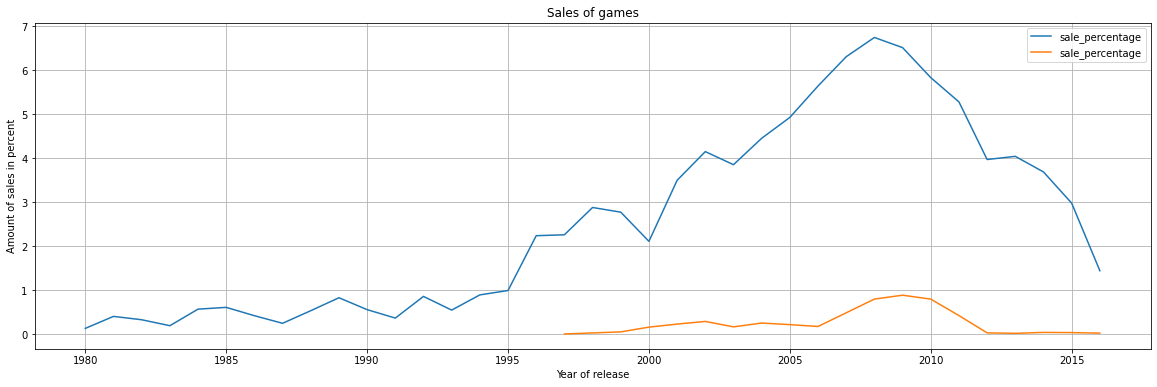

In [153]:
ax = data_not_tbd.pivot_table(index='year_of_release', values='sale_percentage', aggfunc='sum') \
        .plot(grid=True, figsize=(20, 6), label='not TBD')
data_tbd.pivot_table(index='year_of_release', values='sale_percentage', aggfunc='sum') \
        .plot(grid=True, figsize=(20, 6), label='TBD', ax=ax)
plt.title('Sales of games')
plt.xlabel('Year of release')
plt.ylabel('Amount of sales in percent')
plt.show()

Then we checked the percentage of sales of tbd-scored games out of total sales. Since 2012, the amount of sales of a tbd-scored game has decreased to negligible (less than 2% of total sales). It may be due to the wide distribution of services with user scores. 
We can conclude that for the next year's sales forecast we do not need to take into account tbd scores. It is just the minuscule share in scores of all games 
So we can format the column with user scores to a numeric format to make it easier to work with.

In [154]:
data['user_score'] = pd.to_numeric(data['user_score'], errors='coerce') # change format of column with user score to numeric
data['year_of_release'] = pd.to_datetime(data['year_of_release'], format='%Y') # change format of column with year of release to datetime
data.info()
data.head(5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   name             16713 non-null  object        
 1   platform         16715 non-null  object        
 2   year_of_release  16446 non-null  datetime64[ns]
 3   genre            16713 non-null  object        
 4   na_sales         16715 non-null  float64       
 5   eu_sales         16715 non-null  float64       
 6   jp_sales         16715 non-null  float64       
 7   other_sales      16715 non-null  float64       
 8   critic_score     8137 non-null   float64       
 9   user_score       7590 non-null   float64       
 10  rating           9949 non-null   object        
 11  sum_of_sales     16715 non-null  float64       
 12  sale_percentage  16715 non-null  float64       
dtypes: datetime64[ns](1), float64(8), object(4)
memory usage: 1.7+ MB


,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,sum_of_sales,sale_percentage
0,Wii Sports,Wii,2006-01-01,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54,0.925782
1,Super Mario Bros.,NES,1985-01-01,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN,40.24,0.451338
2,Mario Kart Wii,Wii,2008-01-01,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52,0.398398
3,Wii Sports Resort,Wii,2009-01-01,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77,0.367553
4,Pokemon Red/Pokemon Blue,GB,1996-01-01,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN,31.38,0.351963


In [155]:
data['critic_score'].fillna(0)
data['user_score'].fillna(0)

0        8.0
1        0.0
2        8.3
3        8.0
4        0.0
        ... 
16710    0.0
16711    0.0
16712    0.0
16713    0.0
16714    0.0
Name: user_score, Length: 16715, dtype: float64

We replaced the gaps in the columns with user and critic scores with zero. It would be more convenient for us for calculating the average and sums.
There are missing values in the critic and user scores columns, but they do not affect the overall picture: there are still enough scores, and we can still calculate the relevant score.


In [156]:
data.duplicated().sum()

0

Checked that there are no duplicates in the dataset.

<b>We finished preprocessing the data. </b>

## Exploratory data analysis

#### Dependence between user and critic scores

,year_of_release,critic_score,user_score,name
36,2016-01-01,73.155172,6.629771,502
35,2015-01-01,72.871111,6.665993,606
34,2014-01-01,71.065134,6.580243,581
33,2013-01-01,71.278388,6.470724,544
32,2012-01-01,72.984424,6.817404,653
31,2011-01-01,68.692000,6.623553,1136
30,2010-01-01,67.482000,6.875375,1255
29,2009-01-01,67.554531,6.990717,1426
28,2008-01-01,65.904895,6.950983,1427
27,2007-01-01,66.180636,6.895707,1197


Text(0, 0.5, 'Average scores of users and critics')

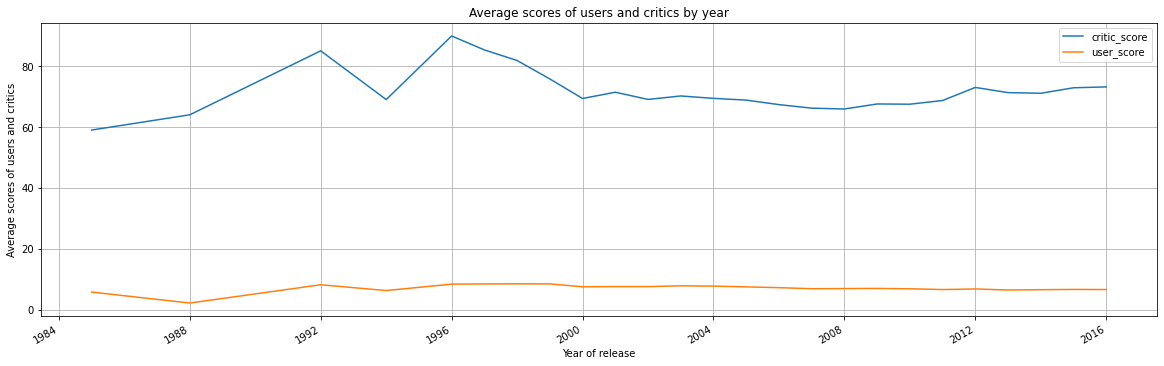

In [157]:
display(data.groupby(['year_of_release']).agg({'critic_score':'mean', 'user_score':'mean', 'name':'count'}).reset_index().sort_values(by='year_of_release', ascending=False))
# calculated average scores of users and critics by years
data.pivot_table(index='year_of_release', values=['user_score','critic_score'], aggfunc='mean').plot(grid=True, figsize=(20, 6))
# made a graph
plt.title('Average scores of users and critics by year')
plt.xlabel('Year of release')
plt.ylabel('Average scores of users and critics')

<b>We grouped the data by year, counted the number of released games, and the average score by user, and critic. The number of games began to grow in 2002, while the scores of users and critics rather decreased. We can assume that with the growth in the number of released games, more mediocre games get released more often, and the overall score of games decreases over the years.</b>

#### Defining popular gaming platforms

In [158]:
best_selled_platform = data.pivot_table(index=['platform'], values=['sum_of_sales', 'sale_percentage'], aggfunc='sum')
best_selled_platform.sort_values(by='sum_of_sales', ascending=False) # creating a pivot table of game sales by platform

,sale_percentage,sum_of_sales
platform,,
PS2,14.084913,1255.77
X360,10.895599,971.42
PS3,10.539262,939.65
Wii,10.178774,907.51
DS,9.041568,806.12
PS,8.197440,730.86
GBA,3.565055,317.85
PS4,3.523443,314.14
PSP,3.298111,294.05


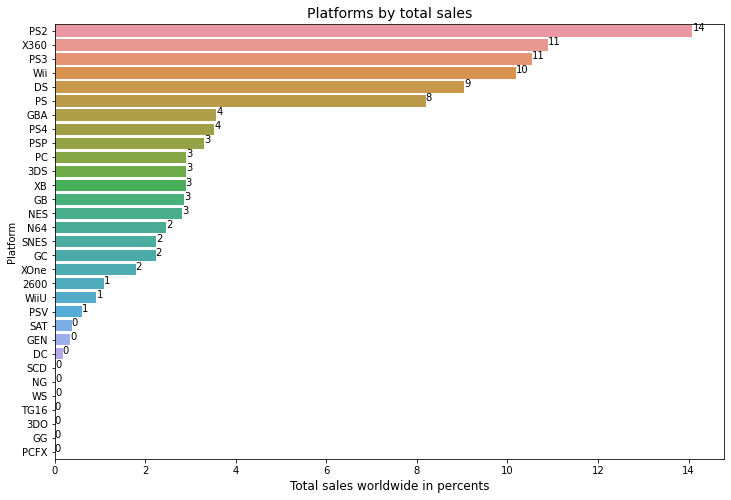

In [159]:
sales_platform = data.groupby(['platform']).agg('sum').reset_index().sort_values(by='sale_percentage', ascending=False)
plt.figure(figsize = (12,8))
fig = sns.barplot(x='sale_percentage',y='platform', data=sales_platform)
fig.set_title('Platforms by total sales',fontsize='14')
fig.set_xlabel('Total sales worldwide in percents', fontsize='12')
fig.set_ylabel('Platform', fontsize='10')
for index, value in enumerate(sales_platform['sale_percentage']):
    plt.text(value, index, str(round(value)))

We correlated the game platforms with the sum of sales and the percentage of sales of games for these platforms. There are six platforms with outstanding sales: PS2 (14% of all games sold), X360 (nearly 11%), PS3 (10.5%), Wii (10.1%), DS (9%) and PS (8% ).

Text(0, 0.5, 'Revenue in millions of dollars')

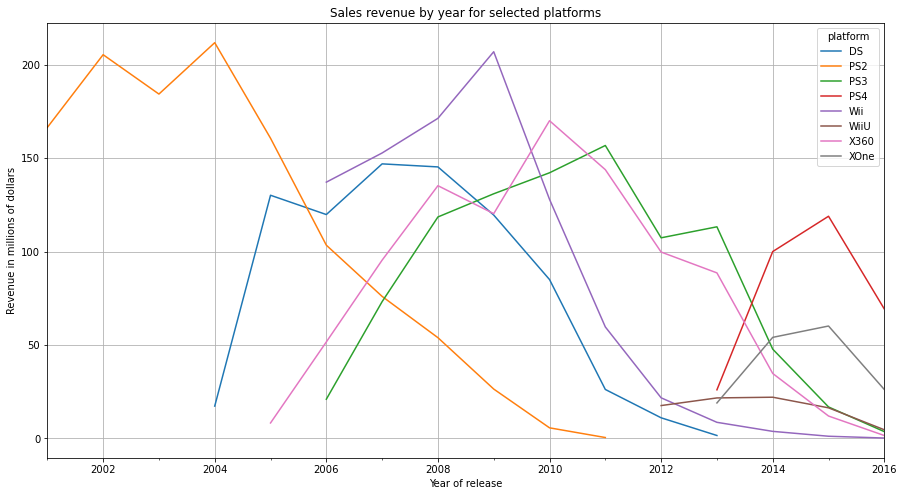

In [160]:
data_saled_platform = data.query('platform == ("DS", "PS2", "PS3", "Wii", "X360", "PS4", "XOne","WiiU") and year_of_release > 2000')
data_saled_platform.pivot_table(index=['year_of_release'], columns='platform', values='sum_of_sales', aggfunc='sum').plot(grid=True, figsize=(15, 8))
plt.title('Sales revenue by year for selected platforms')
plt.xlabel('Year of release')
plt.ylabel('Revenue in millions of dollars')

<b>We also made a pivot table with the sum of sales by year for the most profitable platforms and the platforms that appeared in the last few years.  We can conclude that the average platform is popular for 5-6 years, then the amount of sales declines. 
There are also outstanding platforms: for example, PS2 has been popular for 9 years. 
PS4 has entered the market a few years ago, and we can expect growing demand for games on this platform in the next couple of years, as well as for games on the XOne platform
</b>

## Forecast based on platform popularity

### Determintaion of the necessary data for making a forecast

In [161]:
data_saled_platform = data.query('platform == ("DS", "PS2", "PS3", "Wii", "PS4", "XOne")')

We've made a slice on the platforms we're interested in: DS, PS2, PS3, and Wii (as the platforms that have been the most profitable in the past) and PS4 and XOne (as potentially profitable platforms).

In [162]:
data_cleaned = data_saled_platform.query('year_of_release >= 2012 and platform == ("DS", "PS2", "PS3", "Wii", "X360", "PS4", "XOne", "WiiU")')
data_cleaned.info() # make a slice on necessary data

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1217 entries, 16 to 16710
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   name             1217 non-null   object        
 1   platform         1217 non-null   object        
 2   year_of_release  1217 non-null   datetime64[ns]
 3   genre            1217 non-null   object        
 4   na_sales         1217 non-null   float64       
 5   eu_sales         1217 non-null   float64       
 6   jp_sales         1217 non-null   float64       
 7   other_sales      1217 non-null   float64       
 8   critic_score     641 non-null    float64       
 9   user_score       742 non-null    float64       
 10  rating           790 non-null    object        
 11  sum_of_sales     1217 non-null   float64       
 12  sale_percentage  1217 non-null   float64       
dtypes: datetime64[ns](1), float64(8), object(4)
memory usage: 133.1+ KB


In [163]:
data_cleaned.head(10) # check the data

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,sum_of_sales,sale_percentage
16,Grand Theft Auto V,PS3,2013-01-01,Action,7.02,9.09,0.98,3.96,97.0,8.2,M,21.05,0.236100
31,Call of Duty: Black Ops 3,PS4,2015-01-01,Shooter,6.03,5.86,0.36,2.38,NaN,NaN,NaN,14.63,0.164092
34,Call of Duty: Black Ops II,PS3,2012-01-01,Shooter,4.99,5.73,0.65,2.42,83.0,5.3,M,13.79,0.154671
42,Grand Theft Auto V,PS4,2014-01-01,Action,3.96,6.31,0.38,1.97,97.0,8.3,M,12.62,0.141548
69,Call of Duty: Ghosts,PS3,2013-01-01,Shooter,4.10,3.63,0.38,1.25,71.0,2.6,M,9.36,0.104983
77,FIFA 16,PS4,2015-01-01,Sports,1.12,6.12,0.06,1.28,82.0,4.3,E,8.58,0.096235
81,FIFA Soccer 13,PS3,2012-01-01,Action,1.06,5.01,0.13,1.97,88.0,6.6,E,8.17,0.091636
83,Pokemon Black 2/Pokemon White 2,DS,2012-01-01,Role-Playing,2.79,1.72,3.14,0.41,NaN,NaN,NaN,8.06,0.090402
87,Star Wars Battlefront (2015),PS4,2015-01-01,Shooter,2.99,3.49,0.22,1.28,NaN,NaN,NaN,7.98,0.089505
92,Call of Duty: Advanced Warfare,PS4,2014-01-01,Shooter,2.81,3.48,0.14,1.23,83.0,5.7,M,7.66,0.085916


We filtered the data to the ones we are interested in: we left the most popular platforms, and also removed data up to 2012 in order to get representative user scores.

In [164]:
data_year_prognosis = data.query('year_of_release == 2015') # made a slice on target year
data_year_prognosis.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 606 entries, 31 to 16662
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   name             606 non-null    object        
 1   platform         606 non-null    object        
 2   year_of_release  606 non-null    datetime64[ns]
 3   genre            606 non-null    object        
 4   na_sales         606 non-null    float64       
 5   eu_sales         606 non-null    float64       
 6   jp_sales         606 non-null    float64       
 7   other_sales      606 non-null    float64       
 8   critic_score     225 non-null    float64       
 9   user_score       297 non-null    float64       
 10  rating           315 non-null    object        
 11  sum_of_sales     606 non-null    float64       
 12  sale_percentage  606 non-null    float64       
dtypes: datetime64[ns](1), float64(8), object(4)
memory usage: 66.3+ KB


<b>For targeted analysis, we chose the year 2015: a lot (606) games were released this year. There were also six gaming platforms on the market, which helps us to make a more precise forecast.</b>

### Analysis of the sales divided by platform

count    1217.000000
mean        0.665711
std         1.427093
min         0.010000
25%         0.050000
50%         0.200000
75%         0.660000
max        21.050000
Name: sum_of_sales, dtype: float64

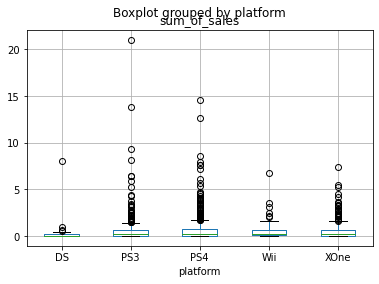

In [165]:
data_cleaned.boxplot('sum_of_sales', by='platform') # divided sales by platforms
data_cleaned['sum_of_sales'].describe()

<b>We looked at how data is distributed across platforms. which we selected. The PS3 and PS4 have significant outliers, as does the DS platform. On the other hand, the XOne and Wii have compact data, which indicates an even distribution of sales.</b>

### Correlation analysis between the sum of sales of games on the particular platform and user scores.

In the following section, we will analyze the correlation between game sales and user scores on the most popular platform (PS3) and other platforms.

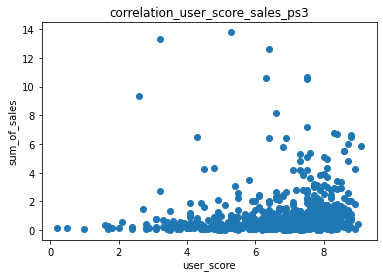

In [166]:
data_ps3 = data.query('platform == "PS3" and sum_of_sales < 15') # made slice by PS3 platform and removed outliers
plt.scatter(data_ps3['user_score'], data_ps3['sum_of_sales']) # made a scatterplot based on this slice
plt.title('correlation_user_score_sales_ps3')
plt.xlabel('user_score')
plt.ylabel('sum_of_sales')
plt.show()

In [167]:
print('{0:.2f}'.format(data_ps3['user_score'].corr(data_ps3['sum_of_sales']))) # calculated the correlation coefficient

0.12


We examined the correlation between the sum of sales and user ratings for the most popular platform PS3. Then we removed outliers. Judging by the graph and the correlation coefficient, there is a connection, but quite weak. The sum of sales begins to grow approximately from a rating of 5, but only a few users give a lesser rating.

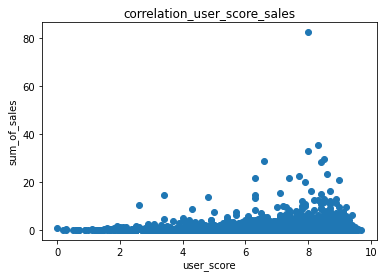

In [168]:
data_other_platforms = data.query('platform != "PS3"') # made slice by other platforms
plt.scatter(data_other_platforms['user_score'], data_other_platforms['sum_of_sales']) # made a scatterplot
plt.title('correlation_user_score_sales')
plt.xlabel('user_score')
plt.ylabel('sum_of_sales')
plt.show()

In [169]:
print('{0:.2f}'.format(data_other_platforms['user_score'].corr(data_other_platforms['sum_of_sales']))) # calculated the correlation coefficient

0.09


On other platforms, the amount of sales is even less correlated to the scores - the graph is flat, sales start to increase a little from the rating 6, but not as much as on PS3. The correlation coefficient shows a weak positive relationship.

<b>Based on the conducted analysis of the correlation between the sum of game sales and user scores, we can conclude that the correlation between these two factors is very weak. It works for the most popular platform PS3 as well as for other platforms.</b>

### Correlation analysis between the sum of sales of games on the platform and the critic's score

In this part, we will analyze how critic' scores affect game sales on the most popular PS3 platform and other platforms.

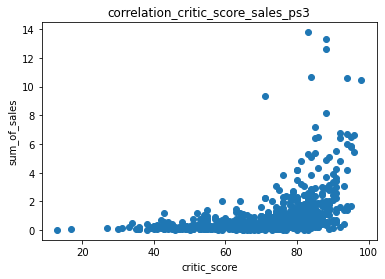

In [170]:
plt.scatter(data_ps3['critic_score'], data_ps3['sum_of_sales']) # made a scatterplot of correlation between critic' score and sales of games on PS3
plt.title('correlation_critic_score_sales_ps3')
plt.xlabel('critic_score')
plt.ylabel('sum_of_sales')
plt.show()

In [171]:
print('{0:.2f}'.format(data_ps3['critic_score'].corr(data_ps3['sum_of_sales']))) # calculated the correlation coefficient

0.45


We've compared the correlation between sales of PS3 games and critics' reviews. There the situation is changing: game sales are more related to the scores of critics than to the scores of users. The growth in sales of games on the PS3 platform starts at a score of 65 and rises noticeably to a score of 80.

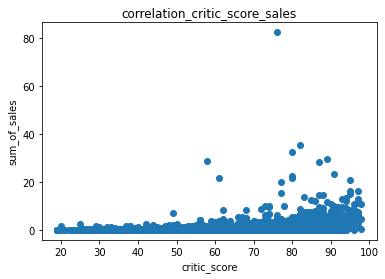

In [172]:
plt.scatter(data_other_platforms['critic_score'], data_other_platforms['sum_of_sales']) 
# made a scatterplot of correlation between critic' score and sales of games on other platforms
plt.title('correlation_critic_score_sales')
plt.xlabel('critic_score')
plt.ylabel('sum_of_sales')
plt.show()

In [173]:
print('{0:.2f}'.format(data_other_platforms['critic_score'].corr(data_other_platforms['sum_of_sales']))) # calculated the correlation coefficient

0.23


Sales of video games on other platforms also have a stronger correlation with critics’ scores than with user scores.

<b>We can conclude that the correlation between game sales and critics’ scores is stronger because critics’ reviews are more significant and popular than user scores. Moreover, critics often have an opportunity to review a game before its official release. Therefore their reviews themselves define the demand for a particular game.</b>

### Correlation between game sales and other factors

#### Correlation between game sales and genre of game

In this part, we will review the sales of games of different genres.

In [174]:
data_cleaned['sale_percentage'] = data_cleaned['sum_of_sales'] / data_cleaned['sum_of_sales'].sum() * 100 
# calculated the percentage of sales of games by genre
data_genre = data_cleaned.groupby('genre').agg({'sum_of_sales':'sum', 'sale_percentage':'sum'}).sort_values(by='sale_percentage', ascending=False)
display(data_genre.sort_values(by='sale_percentage', ascending=False))

,sum_of_sales,sale_percentage
genre,,
Action,261.73,32.305565
Shooter,209.28,25.831616
Sports,129.41,15.973191
Role-Playing,72.30,8.924053
Misc,42.84,5.287779
Racing,33.50,4.134935
Fighting,22.10,2.727823
Platform,15.82,1.952677
Adventure,15.36,1.895898


According to worldwide sales data, the most popular and profitable game genre is action. The top 5 also include shooter, sports, RPG, and mixes.

#### Correlation between game sales and game platform

In [175]:
data_platform = data_cleaned.groupby('platform').agg({'sum_of_sales':'sum', 'sale_percentage':'sum'}).sort_values(by='sale_percentage', ascending=False)
display(data_platform.sort_values(by='sale_percentage', ascending=False)) # divided sales by platform

,sum_of_sales,sale_percentage
platform,,
PS4,314.14,38.774578
PS3,288.79,35.645605
XOne,159.32,19.665009
Wii,35.37,4.365750
DS,12.55,1.549058


The most profitable platforms worldwide over the past few years have been PS4, PS3 and XOne both in absolute and percentage terms.

#### Correlation between game sales and game rating

In [176]:
data_rating = data_cleaned.pivot_table(index=['genre','rating'], values=['sum_of_sales', 'sale_percentage'], aggfunc='sum').sort_values(by='sale_percentage', ascending=False)
display(data_rating.head(10)) # divided sales by genre and rating of games

,,sale_percentage,sum_of_sales
genre,rating,,
Action,M,18.559068,150.36
Shooter,M,17.047040,138.11
Sports,E,12.992335,105.26
Role-Playing,M,4.265771,34.56
Action,E10+,3.969537,32.16
Shooter,T,3.491860,28.29
Action,T,3.225249,26.13
Misc,E10+,2.224225,18.02
Racing,E,2.141526,17.35


The bestselling combinations of genre and rating are action and shooter games with a rating M (mature), closely followed by sports rated E (everyone), RPG rated M, and action rated E10+. 
We can assume that the main game buyers are adults, three of the five best-selling game genres are games with an M rating. Genre Sport with rating E is popular as well.


### The sports events hypothesis

During an analysis of the game’s popularity by genre, we put forward the following hypothesis: the popularity of games of sports genre is determined by ongoing championships and competitions. 
We considered the sales dynamics of games in this genre since the year 2000 (as the relatively recent).

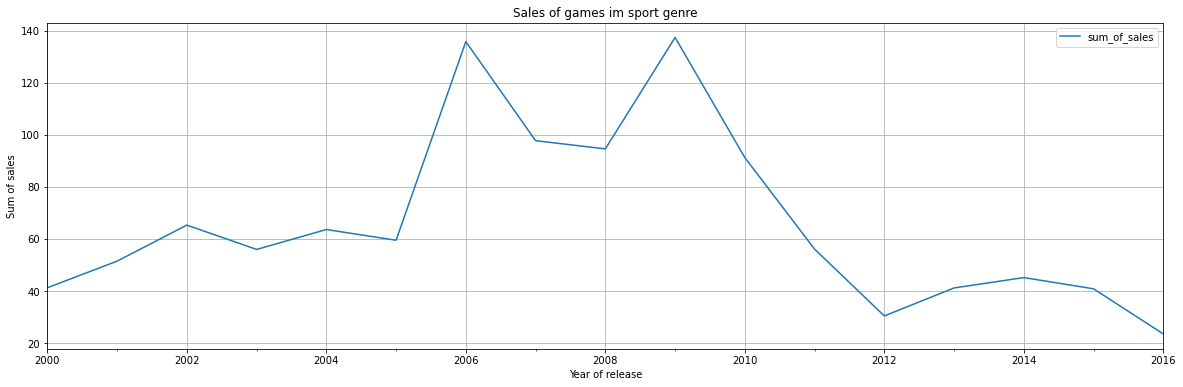

In [177]:
data_sport = data.query('genre == "Sports" and year_of_release >= 2000')
data_sport.pivot_table(index=['year_of_release'], values=['sum_of_sales'], aggfunc='sum') \
        .plot(grid=True, figsize=(20, 6), label='not TBD')
plt.title('Sales of games im sport genre')
plt.xlabel('Year of release')
plt.ylabel('Sum of sales')
plt.show()

<b>According to this plot sales of sports games had two peaks - in 2006 and 2009. In 2006 the game FIFA 07 was released, which became very popular and significantly outperformed its competitors - the game Pro Evolution Soccer. But we can’t explain what caused the rise in the game’s popularity in 2009. So we can neither confirm nor disprove our hypothesis.</b>

## Analysis of user behavior in different world regions

In this part of the project, we will analyze the behavior of average users in the given regions.

### User behavior in North America

In [178]:
data_cleaned['na_percentage'] = data_cleaned['na_sales'] / data_cleaned['na_sales'].sum() * 100 
# calculated sales in North America
data_user_NA = data_cleaned.groupby('genre').agg({'na_sales':'sum', 'na_percentage':'sum'}).sort_values(by='na_percentage', ascending=False)
display(data_user_NA)

,na_sales,na_percentage
genre,,
Action,101.06,30.878758
Shooter,91.83,28.058543
Sports,55.22,16.872403
Role-Playing,26.51,8.100098
Misc,20.25,6.187363
Racing,9.55,2.917991
Fighting,8.95,2.734661
Platform,6.28,1.918846
Adventure,5.48,1.674407


In North America, the statistics coincide with the global one: the most popular genre here is action, the second is shooter, followed by sports, RPGs, and mixes.

In [179]:
data_platform_NA = data_cleaned.groupby('platform')['na_sales'].agg(['sum']).sort_values(by='sum', ascending=False) 
# calculated sales in North America by platform
display(data_platform_NA)

,sum
platform,
PS4,108.74
PS3,103.38
XOne,93.12
Wii,17.45
DS,4.59


The most popular platforms in North America, as well as around the world, are PS4, PS3 and XOne.

In [180]:
data_rating_NA = data_cleaned.pivot_table(index=['genre','rating'], values=['na_sales', 'na_percentage'], aggfunc='sum').sort_values(by='na_percentage', ascending=False)
display(data_rating_NA.head(10)) # calculated sales by age rating and genre

,,na_percentage,na_sales
genre,rating,,
Action,M,18.128208,59.33
Shooter,M,17.993767,58.89
Sports,E,13.214984,43.25
Action,E10+,4.494622,14.71
Role-Playing,M,4.219628,13.81
Shooter,T,4.164630,13.63
Misc,E10+,3.061599,10.02
Action,T,2.847714,9.32
Sports,E10+,2.233561,7.31


The distribution of sales by ratings in North America is almost the same as the worldwide one, only RPGs and action games with an E10+ rating have swapped places.

<b>Based on conducted data analysis, an average user in North America choose the following genres: action, shooter, RPG, mix, and sports games, with a high age rating, and uses the PS3 or PS4 platform.</b>

### User behavior in Europe

In [181]:
data_cleaned['eu_percentage'] = data_cleaned['eu_sales'] / data_cleaned['eu_sales'].sum() * 100
# calculated sales in North America
data_user_EU = data_cleaned.groupby('genre').agg({'eu_sales':'sum', 'eu_percentage':'sum'}).sort_values(by='eu_percentage', ascending=False)
display(data_user_EU.head(10))

,eu_sales,eu_percentage
genre,,
Action,103.03,32.708975
Shooter,81.52,25.880187
Sports,52.12,16.546557
Role-Playing,22.65,7.190704
Racing,18.30,5.809708
Misc,15.56,4.939839
Platform,6.84,2.171498
Adventure,6.38,2.025461
Fighting,6.09,1.933395


The distribution of games by genre in Europe slightly differs from the global one: racing appears in the top 5 popular game genres.

In [182]:
data_platform_EU = data_cleaned.groupby('platform')['eu_sales'].agg(['sum']).sort_values(by='sum', ascending=False)
display(data_platform_EU) # calculated sales by platform

,sum
platform,
PS4,141.09
PS3,106.86
XOne,51.59
Wii,11.92
DS,3.53


In Europe, the platform statistics coincde with the global one

In [183]:
data_rating_EU = data_cleaned.pivot_table(index=['genre','rating'], values=['eu_sales', 'eu_percentage'], aggfunc='sum').sort_values(by='eu_percentage', ascending=False)
display(data_rating_EU.head(10)) # calculated sales by genre and rating

eu_percentage  eu_sales
genre        rating                         
Action       M           19.346646     60.94
Shooter      M           17.416426     54.86
Sports       E           14.254421     44.90
Role-Playing M            4.400140     13.86
Action       E10+         4.095368     12.90
Shooter      T            3.193752     10.06
Racing       E            3.028668      9.54
Action       T            2.781041      8.76
             E            2.314359      7.29
Misc         E10+         1.996889      6.29

The distribution of sales by rating does not differ from the global one. Action and shooter games rated M are followed by E-rated sports, M-rated RPGs, and E10+ rated action games, which also accounted for the most sales.

<b>Based on the conducted analysis, the average user in Europe is similar to the North American user, but he prefers racing games over mixes.</b>

### User behaviour in Japan

In [184]:
data_cleaned['jp_percentage'] = data_cleaned['jp_sales'] / data_cleaned['jp_sales'].sum() * 100
# calculated sales in Japan
data_user_JP = data_cleaned.groupby('genre').agg({'jp_sales':'sum', 'jp_percentage':'sum'}).sort_values(by='jp_percentage', ascending=False)
display(data_user_JP.head(10))

,jp_sales,jp_percentage
genre,,
Action,20.53,34.974446
Role-Playing,14.99,25.536627
Shooter,6.99,11.908007
Fighting,4.28,7.291312
Sports,4.02,6.848382
Misc,2.31,3.935264
Adventure,1.52,2.589438
Racing,1.04,1.771721
Strategy,0.88,1.499148


Statistics for Japan also change the picture of the distribution of sales: action is in the first place, followed by RPGs, shooters, fighting games, and sports. Mixes’ games left the top-5.

In [185]:
data_platform_JP = data_cleaned.groupby('platform')['jp_sales'].agg(['sum']).sort_values(by='sum', ascending=False)
# calculated sales by platform
display(data_platform_JP)

,sum
platform,
PS3,35.29
PS4,15.96
DS,3.72
Wii,3.39
XOne,0.34


Distributions by platforms in Japan do not coincide with global distributions as well: PS3, not PS4 is in the first place,  in the third is DS, not XOne, which slipped down to fifth.

In [186]:
data_rating_JP = data_cleaned.pivot_table(index=['genre','rating'], values=['jp_sales', 'jp_percentage'], aggfunc='sum').sort_values(by='jp_percentage', ascending=False)
display(data_rating_JP.head(10))
# calculated sales by genre and rating

,,jp_percentage,jp_sales
genre,rating,,
Action,M,13.713799,8.05
Shooter,M,8.807496,5.17
Action,T,7.768313,4.56
Role-Playing,T,7.240204,4.25
Fighting,T,4.565588,2.68
Sports,E,4.003407,2.35
Role-Playing,M,3.884157,2.28
Shooter,T,1.345826,0.79
Misc,E,1.294719,0.76


The rating distribution slightly differs from the global one as well: action and shooter with an M rating are in the first place. However, action with a T rating is next, followed by RPGs with a T rating and fighting games with a T rating. At the same time, there are no sports in the top five at all. Interestingly, there are no E or E10+ rated games in the top five. Perhaps in Japan, the rating is defined differently and it is overestimated, or computer games are popular among an older audience than the world average.

<b>An average Japanese user plays RPGs and fighting games more often than a North American or European one but plays fewer mixes. Besides. popular platforms are not only PS3 and PS4, but DS and Wii as well. Games with a high age rating are more popular. in this region.</b>

### Conclusions based on user behaviour

Text(0, 0.5, 'Percentage of genre sales')

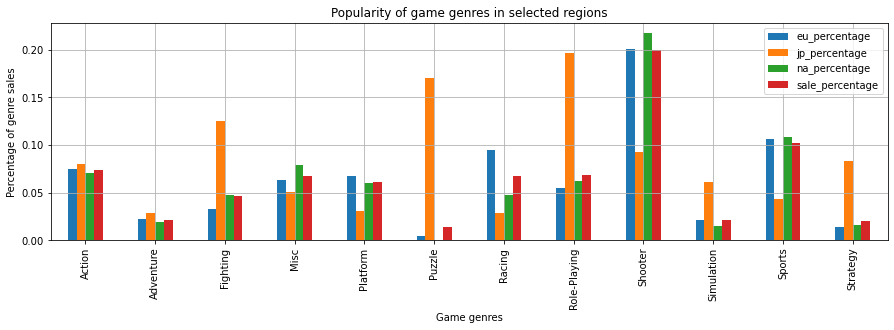

In [187]:
data_cleaned.pivot_table(index=['genre'], values=['sale_percentage','na_percentage','eu_percentage','jp_percentage']).plot.bar(grid=True, figsize=(15, 4))
plt.title('Popularity of game genres in selected regions')
plt.xlabel('Game genres')
plt.ylabel('Percentage of genre sales')
# made a ploth of genre populatiry in regions

Based on the graph above, we can conclude that shooter games are the best-selling games in the world, and in North America, it sells even higher than the global average. In Japan. unlike other regions, fighting games are popular, and sports, racing, and shooters are not as common. The game’s trend in Europe almost completely coincides with the global one - except the racing genre in Europe is more popular than on average in the world and among other regions.

Text(0, 0.5, 'Percentage of platform sales')

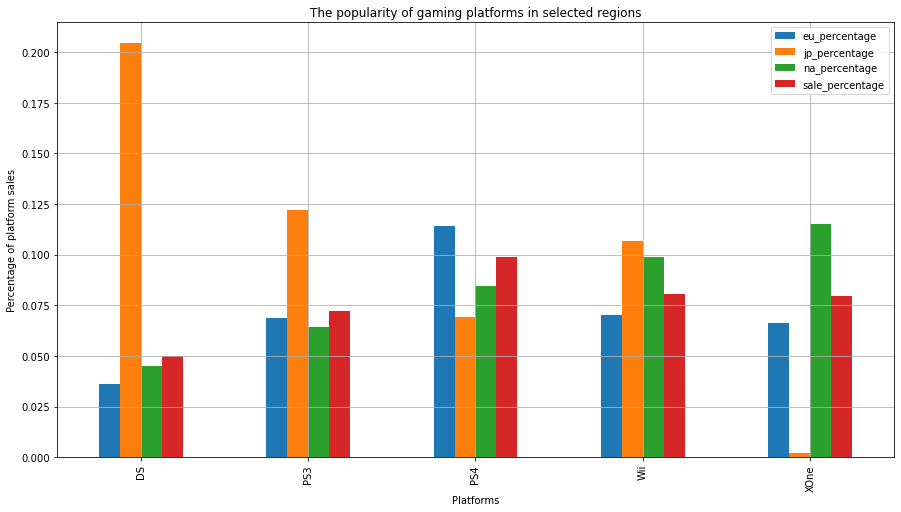

In [188]:
data_cleaned.pivot_table(index=['platform'], values=['sale_percentage','na_percentage','eu_percentage','jp_percentage']).plot.bar(grid=True, figsize=(15, 8))
plt.title('The popularity of gaming platforms in selected regions')
plt.xlabel('Platforms')
plt.ylabel('Percentage of platform sales')
# made a ploth of platform populatiry in regions

Based on the graph above, we can conclude that the most popular platform around the world is PS4, and the world average trend is the same as the regional one. Except for Japan: the DS is the most popular platform in Japan, but the XOne is hardly even used there.

Text(0, 0.5, 'The prevalence of game ratings in the percent')

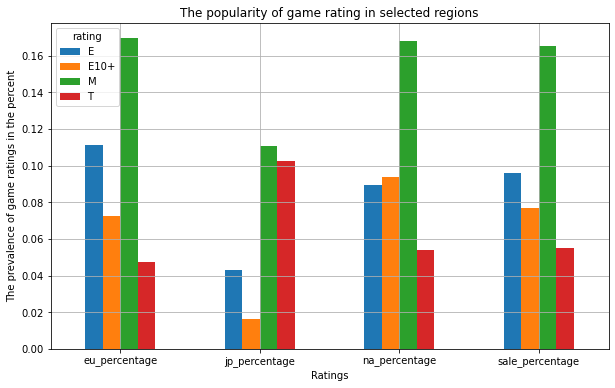

In [204]:
data_cleaned.pivot_table(index=['rating'], values=['sale_percentage','na_percentage','eu_percentage','jp_percentage']).T.plot.bar(grid=True, figsize=(10, 6), rot=0)
plt.title('The popularity of game rating in selected regions')
plt.xlabel('Ratings')
plt.ylabel('The prevalence of game ratings in the percent')
# made a ploth of platform populatiry by ratings

The graph shows that the global trend in the prevalence of games with an age rating almost coincides with the rating by region. The most popular rating is M in all regions, and the most unpopular all over the world is T. It works everywhere except for Japan where it is E10+.

<b>From the research of sales by region, we can make a portrait of a typical user.
In North America, this would be a person playing action games. shooters, RPGs, mixes, or sports games, with a high age rating, and s/he will be using the PS3 or PS4 platform.
In Europe, the user will be quite similar to the North American one, but s/he will prefer racing over mixes.
The Japanese user will play RPGs and fighting games more often than the North American or European, but fewer mixes, and not only on PS3 and PS4. DS and Wii are popular platforms either. And Japanese user prefers games with an even higher age rating.
</b>

## Forecast for the year 2016

In [190]:
data_year_prognosis['sale_percentage'] = data_year_prognosis['sale_percentage'] / data_year_prognosis['sale_percentage'].sum() * 100
data_year_prognosis.groupby(['genre']).agg({'critic_score':'mean', 'user_score':'mean', 'name':'count','na_sales':'sum', 'eu_sales':'sum', 'jp_sales':'sum', 'other_sales':'sum', 'sum_of_sales':'sum', 'sale_percentage':'sum'}).reset_index().sort_values(by='sum_of_sales', ascending=False) 

,genre,critic_score,user_score,name,na_sales,eu_sales,jp_sales,other_sales,sum_of_sales,sale_percentage
0,Action,71.822785,6.941667,253,24.39,24.14,15.98,7.51,72.02,26.875140
8,Shooter,75.150000,6.070833,34,31.94,24.38,2.73,8.46,67.51,25.192179
10,Sports,65.115385,5.006667,59,18.77,15.81,0.73,5.53,40.84,15.239943
7,Role-Playing,77.275862,7.827273,78,13.93,12.93,6.80,3.98,37.64,14.045824
3,Misc,74.857143,6.372222,39,4.82,3.60,2.15,1.00,11.57,4.317486
1,Adventure,76.900000,7.793333,54,2.89,3.35,1.04,0.88,8.16,3.045003
6,Racing,70.250000,5.863636,18,2.09,4.75,0.28,0.95,8.07,3.011419
2,Fighting,70.300000,6.900000,21,3.70,2.38,0.79,1.03,7.90,2.947981
4,Platform,83.750000,7.440000,13,2.49,1.81,1.31,0.44,6.05,2.257631
9,Simulation,75.333333,6.755556,15,1.20,2.47,1.60,0.39,5.66,2.112098


According to the analysis of games released in 2015, the most released genre in the world is action. Although the situation varies region by region: shooters brought in higher revenue than action games in North America and Europe.
At the same time, games in the genres of platforming, RPG, and quests receive the highest ratings from critics, and users in the genres of RPG, puzzle, and adventure.

If we are trying to make a forecast for the year 2017, we should focus on games in the genres of shooting, action, quests, RPGs, and sports worldwide. But in North America we should sell more shooting, in Europe, we should add racing, and in Japan, fighting.
As for the platforms on which games are released, we need need to concentrate on those which were released on market about 3 years ago and later - there is a better chance that they will be popular next year.
Users and critic scores have little effect on game sales. Although, we should check the games with a critics rating of 65 or more, which are the only ones that slightly affect sales.



## Hypothesis testing

### Comparison of the popularity of XOne and PC platforms

In this part, we will find out if the difference in the distribution of user scores is significant for the two popular platforms - XOne and PC.

Hypothesis 0 - Average user scores of the Xbox One and PC platforms are the same

Hypothesis 1 - There are significant difference in average users score of the Xbox One and PC platforms 


In [191]:
data_xone = data.query('platform=="XOne"') # made a slice on XOne
data_xone = data_xone[data_xone['user_score'].notna()] # got rid of null values
data_pc = data.query('platform=="PC"') # made a slice on PC
data_pc = data_pc[data_pc['user_score'].notna()] # got rid of null values

In [192]:
user_variance_xone = np.var(data_xone['user_score']) # counted standard deviation
print('Standard deviation of user score on platform XOne is', '{0:.2f}'.format(user_variance_xone))
user_variance_pc = np.var(data_pc['user_score'])
print('Standard deviation of user score on platform PC is', '{0:.2f}'.format(user_variance_pc))

Standard deviation of user score on platform XOne is 1.90
Standard deviation of user score on platform PC is 2.34


In [193]:
user_deviation_xone = np.std(data_xone['user_score'], ddof=1) # counted deviation
print('The user score deviation on the XOne platform is', '{0:.2f}'.format(user_deviation_xone))
user_deviation_pc = np.std(data_pc['user_score'], ddof=1)
print('The user score deviation on the PC platform is', '{0:.2f}'.format(user_deviation_pc))

The user score deviation on the XOne platform is 1.38
The user score deviation on the PC platform is 1.53


count    182.000000
mean       6.521429
std        1.380941
min        1.600000
25%        5.800000
50%        6.800000
75%        7.500000
max        9.200000
Name: user_score, dtype: float64

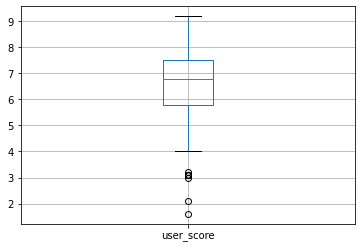

In [194]:
data_xone.boxplot('user_score') # made a boxplot on XOne
data_xone['user_score'].describe()

count    770.000000
mean       7.062468
std        1.529963
min        1.400000
25%        6.200000
50%        7.500000
75%        8.200000
max        9.300000
Name: user_score, dtype: float64

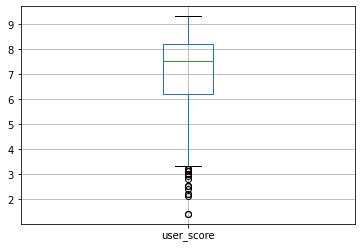

In [195]:
data_pc.boxplot('user_score') # made a boxplot on PC
data_pc['user_score'].describe()

The standard deviation and user scores deviation for the X-One platform are slightly smaller than for the PC platform. 99% of user scores for the X-One platform, according to the three-sigma rule, are distributed between 5.8 and 7.5, and for the PC platform between 6.2 and 8.2.
We hypothesize that there is no statistically significant difference between the user scores of the XBox One and PC platforms because their scores appear to be close to each other.


### Hypothesis testing

In [196]:
score_xone = data_xone['user_score'].values # counted p-value
score_pc = data_pc['user_score'].values

results = st.ttest_ind(score_xone, score_pc, equal_var = True)

alpha = 0.05
print('p-value: ', results.pvalue)
print()
if results.pvalue < alpha:
    print("The user scores of the PC and XOne platforms have significant differences.")
else:
    print("The user scores of the PC and XOne platforms doesn't have significant differences.")

p-value:  1.3896435533548819e-05

The user scores of the PC and XOne platforms have significant differences.


<b>Our null hypothesis was that the user scores of the XOne and PC platforms were not significantly different - and this was not confirmed. Throughout the years of presence of these platforms in the market, the user scores of the XOne and PC platforms have had statistically significant differences, and according to the values in the boxplot and the overall rating data for games on these platforms, PC ratings are significantly higher than of the X-One platform.</b>


## Comparison of the popularity of action and sport genres

In this part, we will find out if the difference in the distribution of user scores is significant for the two popular genres action and sport.

Hypothesis 0 - Average user scores for Action and Sports genres are the same

Hypothesis 1 - Average user scores for the Action and Sports genres are different

In [197]:
data_action = data.query('genre=="Action"') # made a slice by action 
data_action = data_action[data_action['user_score'].notna()] # got rid of null values
data_sport = data.query('genre=="Sports"') # made a slice by sport
data_sport = data_sport[data_sport['user_score'].notna()] # got rid of a null values

In [198]:
user_variance_action = np.var(data_action['user_score']) # counted standart deviation
print('Standard deviation of user scores for genre action is', '{0:.2f}'.format(user_variance_action))
user_variance_sport = np.var(data_sport['user_score'])
print('Standard deviation of user scores for genre sport is', '{0:.2f}'.format(user_variance_sport))

Standard deviation of user scores for genre action is 2.03
Standard deviation of user scores for genre sport is 2.59


In [199]:
user_deviation_action = np.std(data_action['user_score'], ddof=1) # counted deviation
print('The user score deviation for the action genre',  '{0:.2f}'.format(user_deviation_action))
user_deviation_sport = np.std(data_sport['user_score'], ddof=1)
print('The user score deviation for the sport genre', '{0:.2f}'.format(user_deviation_sport))

The user score deviation for the action genre 1.43
The user score deviation for the sport genre 1.61


<AxesSubplot:title={'center':'user_score'}, xlabel='genre'>

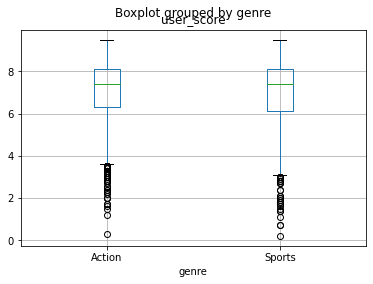

In [200]:
data_genres = data.query('genre==("Action","Sports")') # made boxplots
data_genres.boxplot('user_score', by='genre')

In [201]:
data_action['user_score'].describe() # explored the scores data in the action genre

count    1830.000000
mean        7.054044
std         1.425394
min         0.300000
25%         6.300000
50%         7.400000
75%         8.100000
max         9.500000
Name: user_score, dtype: float64

In [202]:
data_sport['user_score'].describe() # explored the scores data in the sport genre

count    1103.000000
mean        6.961197
std         1.611370
min         0.200000
25%         6.100000
50%         7.400000
75%         8.100000
max         9.500000
Name: user_score, dtype: float64

The standard deviation and user scores deviation for an action game are slightly less than for a sports game. 99% of user scores for the action genre, according to the three-sigma rule, are distributed between 6.3 and 8.1, and for the sports genre between 6.1 and 8.1.
We hypothesize that there is no statistically significant difference between the user scores of the action and sports genres because the user scores of the two genres appear to be close to each other.

### Hypothesis testing

In [203]:
score_action = data_action['user_score'].values # counted p-value 
score_sport = data_sport['user_score'].values

results = st.ttest_ind(score_action, score_sport, equal_var = True)

alpha = 0.05
print('p-value: ', '{0:.2f}'.format(results.pvalue))
print()
if results.pvalue < alpha:
    print('The average user scores of the action and sports genres have significant differences.')
else:
    print('The average user scores of the action and sports genres does not have significant differences.')

p-value:  0.10

The average user scores of the action and sports genres does not have significant differences.


<b>Our null hypothesis was that the user scores of action and sports genres did not have significant differences - and it was confirmed. Based on the data, user scores for the action and sports genres are significantly close.</b>

# Overall conclusion

During our research, we determined the years that we should focus on while making a forecast for the next year: in this case, this is the year 2012 and later.

We found the average life expectancy of gaming platforms (5-6 years) and made a portrait of the average users in the main sales regions.

In North America, this would be a person playing action games, shooters, RPGs, mixes, or sports games, with a high age rating, and s/he will be using the PS3 or PS4 platform.
In Europe, the user will be quite similar to the North American one, but s/he will prefer racing over mixes.
The Japanese user will play RPGs and fighting games more often than the North American or European, but fewer mixes, and not only on PS3 and PS4. DS and Wii are popular platforms either. And Japanese user prefers games with an even higher age rating.

We found out that game sales are influenced more by critic scores than by user scores, but neither of them is a significant factor in the amount of revenue.
Although, we should check the games with a critics rating of 65 or more, which are the only ones that slightly affect sales.

The most popular genres are action, shooter, sports, RPG, and mix, and user scores of action and sports genres do not have significant differences, but PC and X-One platforms do.

If we are trying to make a forecast for the year 2017, we should focus on games in the genres of shooting, action, quests, RPGs, and sports worldwide. But in North America we should sell more shooting, in Europe, we should add racing, and in Japan, fighting.
As for the platforms on which games are released, we need need to concentrate on those which were released on market about 3 years ago and later - there is a better chance that they will be popular next year.
